In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# Sentiment Classifier

> Classification of email job offer response emails 

This project classifies job offer response emails as 'positive' or 'negative' according to whether an email response expresses an interest in a job offer. The dataset contains job offer response emails annotated with 'positive' and 'negative' labels. The positive labels represent an interest in a job offer.

## Install

Clone the [GitHub](https://github.com/kikejimenez/job_offer_classifier) repository and `cd` to the cloned repo directory. Install the depencies in the `requeriments.txt`. The use of *REPL* or  *Notebook* is strongly  recommended

## How to use

In [ ]:
#hide
#Shut down logging except Error
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

### Run the Pipeline

First load and run the data science pipeline by importing the library  *job_email_classifier.pipeline_classifier*

In [ ]:
from job_offer_classifier.pipeline_classifier import Pipeline

Instantiate the class `Pipeline` and call the `pipeline` method. This method loads the dataset, and trains and evaluates the model. The source file is the annotated dataset of payloads.

In [ ]:
pl = Pipeline(src_file = '../data/interim/payloads.csv')
pl.pipeline()

### Predict Job Offer Sentiments

To make a prediction, use the `sentiment` method

In [ ]:
pl.sentiment(''' Thank you for offering me the position of Merchandiser with Thomas Ltd.
I am thankful to accept this job offer and look ahead to starting my career with your company
on June 27, 2000.''')

'positive'

One can take an example from the test set, contained in the `dfs` attribute. This attribute is a dictionary of  pandas dataframes.

In [ ]:
example = pl.dfs['test'].sample().payload.iloc[0]
print(example.strip())

as we discussed on the phone, i am very pleased to accept the position of Scientific laboratory technician with Wagner-Rodriguez, thank you for the opportunity.
i am eager to
make a positive contribution to the company and to work with everyone on the team .
as we discussed, my starting salary will be $9521 and health and life insurance benefits will be provided after 30 days of employment.
i look forward to starting employment on October 12, 1991. if there is any additional information or paperwork you need prior to then, please let me
know.


In [ ]:
pl.sentiment(example)

'positive'

## Performance

We use two tools to assesss the performance of the model:
  - Confusion Matrix 
  - K fold Validation

### Confusion matrix

To plot the confusion matrix the `Pipeline` has the method `plot_confusion_matrix`.

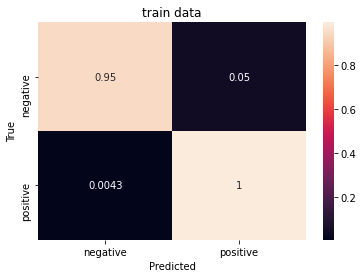

In [ ]:
pl.plot_confusion_matrix('train')

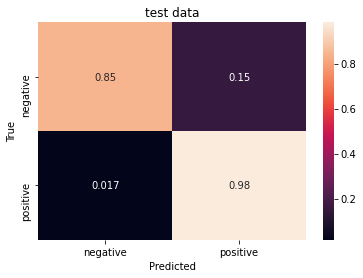

In [ ]:
pl.plot_confusion_matrix('test')

The 7% of the cases that are negatives are considered as positive. Less than one percent of the cases that are positive are considered as negative. Therefore, the model tends to be benevolent regarding job acceptances. This is consistent with that fact that the dataset has more positive cases than negative cases

### K fold validation

To assess the performance of the model via the k fold validation method, import the class `KFoldPipeline` in the  *k_fold_validation* submodule of *job_offer_classifier*

In [ ]:
from job_offer_classifier.k_fold_validation import KFoldPipeline

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


Run the `k_fold_validation` method

In [ ]:
kfp = KFoldPipeline(dataset_file='../data/interim/payloads.csv',n_splits=4)
kfp.k_fold_validation()

The averaged scores are stored in `avg_evaluation`

In [ ]:
kfp.avg_evaluation['train']

{'accuracy': 0.9899031668901443,
 'accuracy_baseline': 0.7989590167999268,
 'auc': 0.9956953227519989,
 'auc_precision_recall': 0.9985404014587402,
 'average_loss': 0.0570867033675313,
 'label/mean': 0.7989590167999268,
 'loss': 0.04432356869801879,
 'precision': 0.9893230199813843,
 'prediction/mean': 0.8003168553113937,
 'recall': 0.997493714094162,
 'global_step': 5000.0,
 'f1_score': 0.9933855340830338}

In [ ]:
kfp.avg_evaluation['test']

{'accuracy': 0.9477716684341431,
 'accuracy_baseline': 0.7994505614042282,
 'auc': 0.4650697857141495,
 'auc_precision_recall': 0.9483350813388824,
 'average_loss': 0.1706756204366684,
 'label/mean': 0.7994505614042282,
 'loss': 0.1706756204366684,
 'precision': 0.9448260068893433,
 'prediction/mean': 0.8004413545131683,
 'recall': 0.9670821875333786,
 'global_step': 5000.0,
 'f1_score': 0.9555388394138677}

Over 4 foldings, the averaged accuracy of 94%, while the F1 score is 95%

## Documentation

To further inquire on the training parameters, how to store and load trained models, please refer to the [pipeline_classifier](/job_offer_classifier/pipeline_classifier/) module. The k fold validation can be found in the [k_fold_validation](/job_offer_classifier/k_fold_validation/) module